In [111]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy import stats
import os

x = pd.read_csv('gdrive/My Drive/clean_data.csv', usecols=["dateTime", "temp", "sal", "ftu","fluors","o2", "kd","par_0","par_1","par_2"], na_filter=False) 
y=pd.read_csv('gdrive/My Drive/clean_data.csv', usecols=["dateTime"], keep_default_na=False)
#y = pd.read_csv('gdrive/My Drive/clean_data.csv', usecols=["dateTime"], date_parser=["dateTime"])

#df = pd.read_csv('gdrive/My Drive/clean_data.csv', sep=';', dtype=dtypes)
#df["DateTime"] = df.apply(lambda row: pd.to_datetime(f'{row["Date"]} {row["Time"]}'), axis="columns")
#df.drop(['Date','Time'], axis=1, inplace=True)


y['dateTime'] = pd.to_datetime(y['dateTime'])
x['dateTime'] = pd.to_datetime(x['dateTime'])
y=y.squeeze()
x = x.set_index('dateTime')

x_temp=x.iloc[:,0]
x_sal=x.iloc[:,1]
x_ftu=x.iloc[:,2]
x_fluors=x.iloc[:,3]
x_02=x.iloc[:,4]
x_kd=x.iloc[:,5]
x_par_0=x.iloc[:,6]
x_par_1=x.iloc[:,7]
x_par_2=x.iloc[:,8]
x_temp= pd.to_numeric(x_temp, errors='ignore')
x_sal= pd.to_numeric(x_sal, errors='coerce')
x_ftu= pd.to_numeric(x_ftu, errors='coerce')
x_fluors= pd.to_numeric(x_fluors, errors='coerce')
x_02= pd.to_numeric(x_02, errors='coerce')
x_kd=pd.to_numeric(x_kd,errors='coerce')
x_par_0= pd.to_numeric(x_par_0, errors='coerce')
x_par_1= pd.to_numeric(x_par_1, errors='coerce')
x_par_2= pd.to_numeric(x_par_2, errors='coerce')


Mounted at /content/gdrive


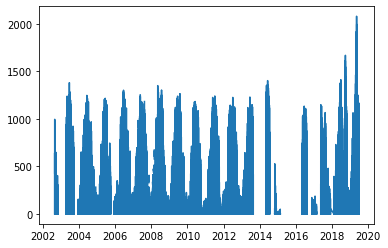

In [94]:
#plot original to see if it can be interpolated (simply)
plt.plot(x_par_1)
plt.show()

In [112]:
#filling in a range of missing values
x_temp_2 = x_temp.interpolate(method="linear", limit=550, limit_direction='both',limit_area='inside') #5.7 days
x_sal_2 = x_sal.interpolate(method="linear", limit=3800, limit_direction='both',limit_area='inside') #probably too big of a gap -39 days
x_ftu_2 = x_ftu.interpolate(method="linear", limit=1500, limit_direction='both',limit_area='inside') #15 days
x_kd_2 = x_kd.interpolate(method="linear", limit=2000, limit_direction='both',limit_area='inside') #20 days
x_fluors_2 = x_fluors.interpolate(method="linear", limit=2000, limit_direction='both',limit_area='inside') #20 days
x_02_2 = x_02.interpolate(method="linear", limit=9000, limit_direction='both', limit_area='inside') #100 days - but is ok because of the trend


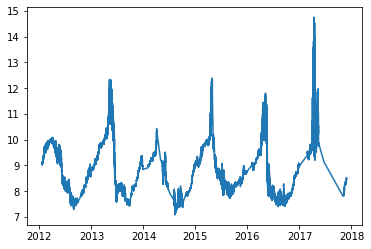

In [99]:
plt.plot(x_02_2)
plt.show()

In [113]:
#removing nan  values to do machine learning later
x_temp_2.fillna('')
x_sal_2.fillna("")
x_ftu_2.fillna('')
x_kd_2.fillna('')
x_fluors_2.fillna('')
x_02_2.fillna('')

dateTime
2002-08-28 13:15:00     
2002-08-28 13:30:00     
2002-08-28 13:45:00     
2002-08-28 14:00:00     
2002-08-28 14:15:00     
                      ..
2019-12-07 13:30:00     
2019-12-07 14:00:00     
2019-12-07 14:30:00     
2019-12-07 15:00:00     
2019-12-07 15:30:00     
Name: o2, Length: 324479, dtype: object

In [114]:
#replacing x with interpolated columns
x.iloc[:,0]=x_temp_2
x.iloc[:,1]=x_sal_2
x.iloc[:,2]=x_ftu_2
x.iloc[:,3]=x_fluors_2
x.iloc[:,4]=x_02_2
x.iloc[:,5]=x_kd_2

In [116]:
cd "/content/gdrive/My Drive"

/content/gdrive/My Drive


In [117]:
x.to_csv('interp_data.csv', sep = ',', na_rep='', index=False)
